<a href="https://colab.research.google.com/github/SteelworkerDB/ML_W2/blob/main/Ejercicio_basico_conjunto_arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**EJERCICIO CONJUNTO DE ARBOLES**

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor #Para instancia de modelo Bagged Trees
from sklearn.ensemble import RandomForestRegressor #Para instancia de modelo Random Forest

EJECUTAR:
1) Bagged trees y
2) Regresión de bosque aleatorio

In [50]:
df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [51]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

In [52]:
#División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
#Instancianmos el modelo BaggedTres en bt
bt = BaggingRegressor(random_state = 42)

In [54]:
#Ajuste del modelo bt
bt.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [55]:
#Instancianmos el modelo de Bosque Aleatorio en rf
rf = RandomForestRegressor(random_state = 42)

In [56]:
#Ajuste del modelo rf
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

- Evaluación de los modelos sin modificar profundidad

In [57]:
#Para evaluar el modelo Bagged Trees
bt_train_score = bt.score(X_train, y_train)
bt_test_score = bt.score(X_test, y_test)
print(bt_train_score)
print(bt_test_score)

0.9606756023782893
0.8204208271364619


In [58]:
#Para evaluar el modelo RandomForest
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


*Se observa que para ambos modelos no alcanzan el sobreajuste máximo de 1, y que predice mejor el comportamiento para el conjunto de prueba que una regresión con árbol de decisión simple (sin bagging, sin random forest)*

In [59]:
len([estimator.get_depth() for estimator in rf.estimators_])

100

###**Variación de profundidad en bagged trees**

In [60]:
#Probar varios valores de max_depth en los arboles de decision del modelo BaggingRegressor
r2_train_list=[]
r2_test_list =[]
for n in range(1,31):
  bt = BaggingRegressor(DecisionTreeRegressor(max_depth=n),random_state = 42)
  #ref https://stackoverflow.com/questions/61424764/baggingclassifier-unexpected-keyword-argument-max-depth
  bt.fit(X_train, y_train)
  r2_train = bt.score(X_train, y_train)
  r2_test = bt.score(X_test, y_test)
  r2_train_list.append(r2_train)
  r2_test_list.append(r2_test)

print(r2_train_list)
print(r2_test_list)

[0.6043184188047235, 0.7724950208323925, 0.8512969903452947, 0.8868158652313008, 0.9242774448708397, 0.9360784604318403, 0.9460670596776493, 0.9523439293369232, 0.9571900471836267, 0.9569880689991568, 0.9608890222224368, 0.9598496148813997, 0.9608813570024688, 0.9618636907582193, 0.9613865507203562, 0.9621644904538348, 0.9614963858805455, 0.9618229992619656, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893, 0.9606756023782893]
[0.48403612673821583, 0.6927851439377513, 0.7215100211330349, 0.73509701712712, 0.7863683973914674, 0.8185835473835071, 0.8340148458408375, 0.8312125512161316, 0.8233320967704763, 0.8273647603015981, 0.8261088652521356, 0.8249441074716676, 0.8270922371098932, 0.8216995635540872, 0.824840426053222, 0.8238623490979159, 0.8207670485639342, 0.8219254735781312, 0.8204208271364619, 0.8204208271364619, 

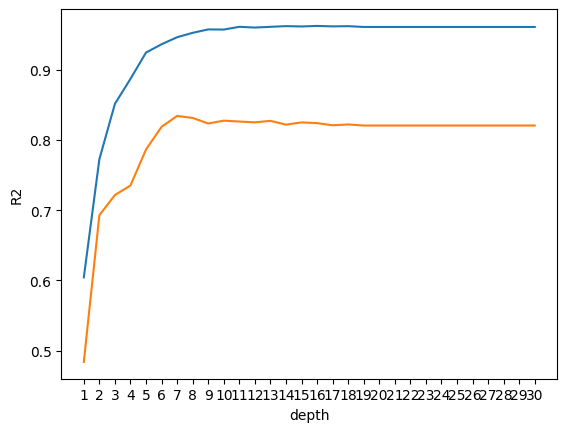

In [61]:
#Graficamos los valores R2 para el entrenamiento y prueba
import matplotlib.pyplot as plt
plt.plot((range(1,31)), r2_train_list)
plt.plot((range(1,31)), r2_test_list)
plt.xlabel('depth')
plt.xticks(range(1,31))
plt.ylabel('R2');


Al variar la profundidad, se mantiene constante el sobreajuste.  Más allá de 7 el efecto parece ser muy pequeño sobre la capacidad del modelo.  

###**Variación de profundidad en random forest**

In [62]:
#Probar varios valores de max_depth en los arboles de decision del modelo BosqueAleatorio
r2_train_list=[]
r2_test_list =[]
for n in range(1,31):
  rf = RandomForestRegressor(max_depth=n,random_state = 42)
  rf.fit(X_train, y_train)
  r2_train = rf.score(X_train, y_train)
  r2_test = rf.score(X_test, y_test)
  r2_train_list.append(r2_train)
  r2_test_list.append(r2_test)

print(r2_train_list)
print(r2_test_list)

[0.6070852174343426, 0.7748619690475894, 0.862363816665076, 0.9043769267341011, 0.9313978652601169, 0.9490087382860998, 0.9601225099870124, 0.9667660339272678, 0.9708593696865943, 0.9739265386241982, 0.9750091214948053, 0.9759260617365123, 0.9765423831259193, 0.9764923787434159, 0.9767306784926062, 0.97711520341119, 0.977101597043884, 0.9769198005805875, 0.9771401343856546, 0.9771026568746994, 0.9771312558570984, 0.9771340465453854, 0.9771342521069045, 0.9771342521069045, 0.9771342521069045, 0.9771342521069045, 0.9771342521069045, 0.9771342521069045, 0.9771342521069045, 0.9771342521069045]
[0.5122764961285613, 0.706039198745489, 0.7496106326685028, 0.774126270722379, 0.8117698186150566, 0.8228893596382405, 0.8306604376310001, 0.8224374530026517, 0.8288183588216603, 0.834746736666161, 0.8324413761282909, 0.8284310948097897, 0.8281727560002619, 0.8297839976924557, 0.8323476732055544, 0.8326320395685445, 0.8347318568380511, 0.8298135633271171, 0.8335442728026894, 0.8336373484566015, 0.833

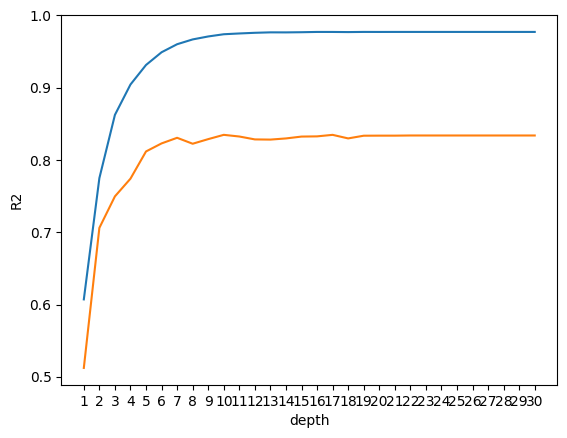

In [63]:
#Graficamos los valores R2 para el entrenamiento y prueba
import matplotlib.pyplot as plt
plt.plot((range(1,31)), r2_train_list)
plt.plot((range(1,31)), r2_test_list)
plt.xlabel('depth')
plt.xticks(range(1,31))
plt.ylabel('R2');

Los modelos se comportan muy parecido frente a cambios en la profundidad